In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from os.path import dirname, join
import numpy as np
#import click
#import snakemake
from src.utils.data_io import af_to_vireo
from icecream import ic


import seaborn as sns
import matplotlib.pyplot as plt

fig_utils from mplh


In [2]:
from src.utils import impute_af as imp

In [3]:
#cells_meta = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/cells_meta.tsv"


#sample = "Input,Flt3l"#["Input","Flt3l"]
# pileup_d = "/mnt/md0/isshamie/Projects/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor0"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor0"

cell_pct_cov_thresh = 0.6
cov_thresh = 10


alt_thresh = [{"cell_pct_cov_thresh":0.4, "cov_thresh": 10}, 
             {"cell_pct_cov_thresh":0.8, "cov_thresh": 10},
             {"cell_pct_cov_thresh":0.7, "cov_thresh": 30}, 
             {"cell_pct_cov_thresh":0.6, "cov_thresh": 30}]


# pileup_d = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/coverage_merged/donor1/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk"
# outdir="/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor1"
# sample = "Input,Flt3l"#["Input","Flt3l"]


pileup_d = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/coverage_merged/donor0"
outdir="/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor0"
#sample = ""

ref_mt = "/data/Mito_Trace/data/external/chrM_refAllele.txt"

In [4]:
#sample = sample.split(",")

In [5]:
# cmd = f"cp {cells_meta} {join(outdir, 'cells_meta.tsv')}"
# print(cmd)
# !{cmd}


In [6]:
#cells_meta = pd.read_csv(cells_meta , sep='\t')
#sample = sample.split(',')
ref_fa = pd.read_csv(ref_mt, sep='\t', header=None, index_col=0)

In [7]:
af_pile = pd.read_csv(join(pileup_d, f"merged.af.tsv"), sep="\t", index_col=0).transpose()
dp_pile = pd.read_csv(join(pileup_d, f"merged.coverage.tsv"), sep="\t", index_col=0).transpose()

vars_map = {f"{x.split('>')[0][:-1]}{x[-1]}":x for x in af_pile.columns}
af_pile.columns = [f"{x.split('>')[0][:-1]}{x[-1]}" for x in af_pile.columns]
dp_pile.columns = [f"{x.split('>')[0][:-1]}{x[-1]}" for x in dp_pile.columns]
af_pile.index.name = "Cell"
dp_pile.index.name = "Cell"
#af_pile.columns.name = "Variant"


In [9]:
pileup_d

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/coverage_merged/donor0'

In [8]:
ls {pileup_d}/cells_me

af_by_cell.AD.tsv    initial_cell_depth.png      merged.G.txt
af_by_cell.bq.tsv    merge.A.strands.txt         merged.rds
af_by_cell.DP.tsv    merge.coverage.strands.txt  merged.signac.rds
af_by_cell.tsv       merge.C.strands.txt         merged.T.txt
cellSNP.base.vcf     merged.af.mgatk.tsv         merged.variantQC.png
cellSNP.samples.tsv  merged.af.tsv               merged.variant.rds
cellSNP.tag.AD.mtx   merged.A.txt                merge.G.strands.txt
cellSNP.tag.DP.mtx   merged.coverage.tsv         merge.T.strands.txt
cellSNP.tag.OTH.mtx  merged.coverage.txt         out.ipynb
chrM_refAllele.txt   merged.C.txt                stats.csv
heatmap.png          merged.depthTable.txt


In [8]:
af_pile

,146A,709A,930A,1413A,1888A,1949A,2442A,2514A,2857A,3242A,...,15607G,16519G,2623T,3735T,7361T,7485T,7639T,12283T,16294T,16296T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGACGCCAA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.028777,0.0,0.021622,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.029586,0.000000,0.0,0.000000,0.0,0.0
AAACGAACACGCTCAG-1_Input,0.0,0.000000,0.035714,0.0,0.017778,0.000000,0.0,0.000000,0.007194,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.007463,0.0,0.006826,0.0,0.0
AAACGAAGTACCAAGG-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.030769,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACGAAGTCTGATTG-1_Flt3l,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACGAAGTTCTCGAA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTGTAGGGTCA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.027778,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTGTGTTTCTTAC-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTGTTCCTGAAAC-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


## ?Find if it's the imputation.. dont i need to do that per donor? 

## Impute the new data:
### If coverage less than 10, and >80% have coverage, then impute the median of the cells with coverage onto the low coverage cells (do i need to set depth to 10?)

In [9]:
af_pile

,146A,709A,930A,1413A,1888A,1949A,2442A,2514A,2857A,3242A,...,15607G,16519G,2623T,3735T,7361T,7485T,7639T,12283T,16294T,16296T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGACGCCAA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.028777,0.0,0.021622,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.029586,0.000000,0.0,0.000000,0.0,0.0
AAACGAACACGCTCAG-1_Input,0.0,0.000000,0.035714,0.0,0.017778,0.000000,0.0,0.000000,0.007194,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.007463,0.0,0.006826,0.0,0.0
AAACGAAGTACCAAGG-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.030769,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACGAAGTCTGATTG-1_Flt3l,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACGAAGTTCTCGAA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTGTAGGGTCA-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.027778,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTGTGTTTCTTAC-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTGTTCCTGAAAC-1_Input,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [10]:
dp_pile

,146A,709A,930A,1413A,1888A,1949A,2442A,2514A,2857A,3242A,...,15607G,16519G,2623T,3735T,7361T,7485T,7639T,12283T,16294T,16296T
Cell,,,,,,,,,,,,,,,,,,,,,
AAACGAAAGACGCCAA-1_Input,44,124,92,127,113,139,142,185,159,152,...,102,144,81,149,169,141,115,166,81,78
AAACGAACACGCTCAG-1_Input,102,200,168,285,225,197,286,304,278,299,...,230,120,188,240,219,268,267,293,141,142
AAACGAAGTACCAAGG-1_Input,63,102,103,130,51,65,146,184,92,211,...,70,71,56,88,61,91,89,100,50,50
AAACGAAGTCTGATTG-1_Flt3l,15,59,44,41,49,44,41,66,35,60,...,58,43,20,33,60,46,38,29,22,24
AAACGAAGTTCTCGAA-1_Input,57,50,84,67,79,68,118,150,63,116,...,118,86,58,64,76,126,96,73,67,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTGTAGGGTCA-1_Input,47,94,83,118,89,72,91,105,87,98,...,84,75,68,108,102,131,78,120,66,64
TTTGTGTGTTTCTTAC-1_Input,66,99,67,107,89,68,115,135,105,116,...,129,77,82,97,104,90,74,77,61,61
TTTGTGTTCCTGAAAC-1_Input,54,172,107,174,191,127,170,226,119,180,...,137,99,92,150,142,197,170,210,124,114


before filt (293816, 3)
after filt, low cov (197, 3)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


n vars imputed 30
{'16296T': 0.0023346287658233384, '152C': 0.0076671601890051936, '310C': 0.890418930735155, '4917G': 0.0029855496421321314, '8697A': 0.00318051116580669, '3820A': 0.0022463676103734107, '14488C': 0.0022712629933937366, '16304C': 0.0026014600586474713, '16519G': 0.00019399745813745116, '16294T': 0.002941329528601663, '3735T': 0.0020266484317978278, '4837A': 0.002253230430009715, '10463C': 0.0030622401509327276, '4216C': 0.003369928592174323, '15928A': 0.0025369414646517884, '15244C': 0.0005649336329886138, '4117C': 0.0033905116915753744, '16519C': 0.002399078463795059, '13369C': 0.001367456396591126, '146A': 0.00017794402571334077, '10559G': 0.003531319858406275, '4117G': 0.00015457182528071166, '189G': 0.0019477093503467244, '14674C': 0.003476451229298146, '13368A': 0.0027209416290189846, '4248C': 0.0037598733425763193, '7028G': 0.0003449195929989768, '8743A': 0.006402476554149391, '15244G': 0.001412669303420161, '1082G': 0.001087146094912103}


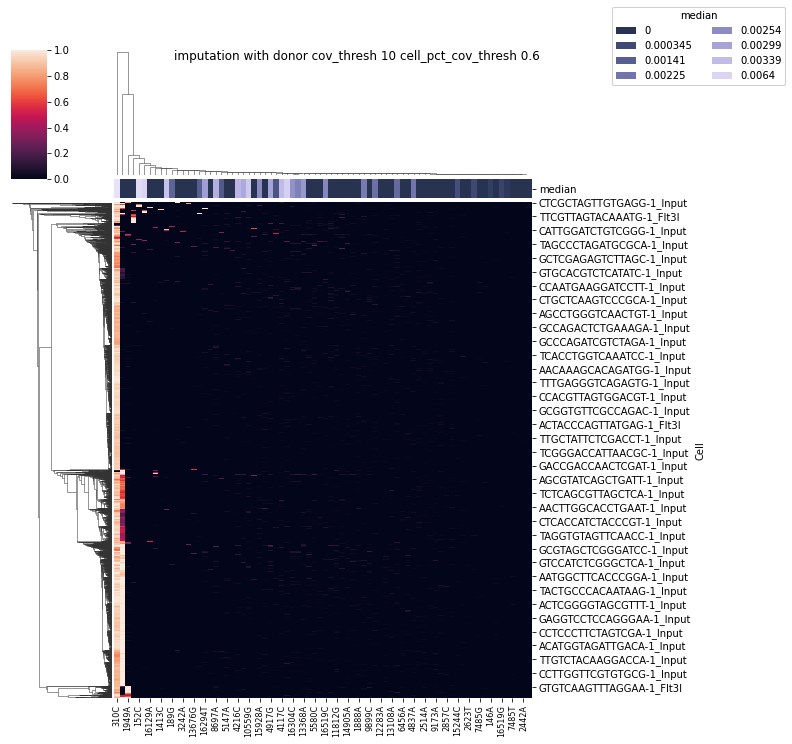

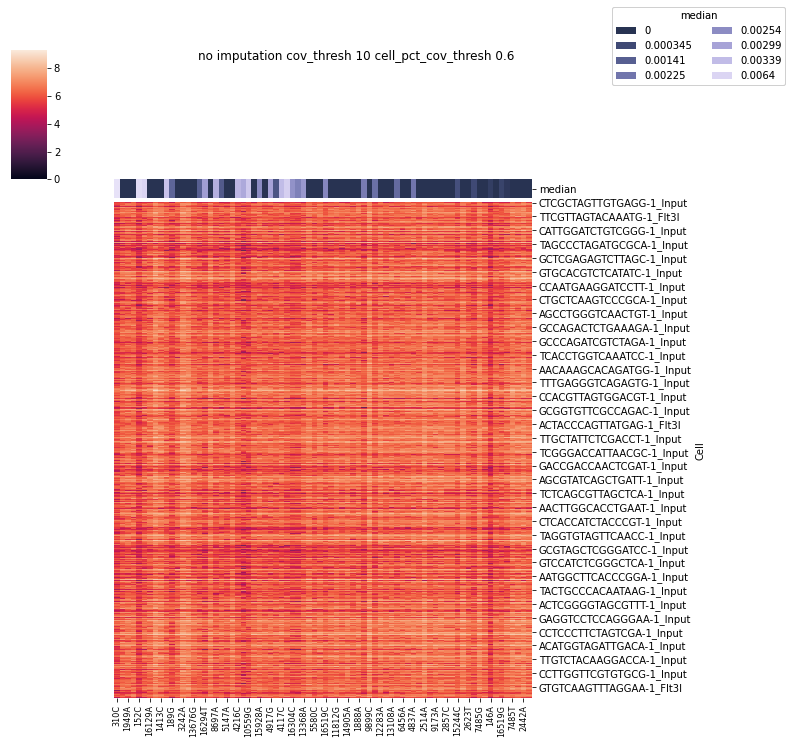

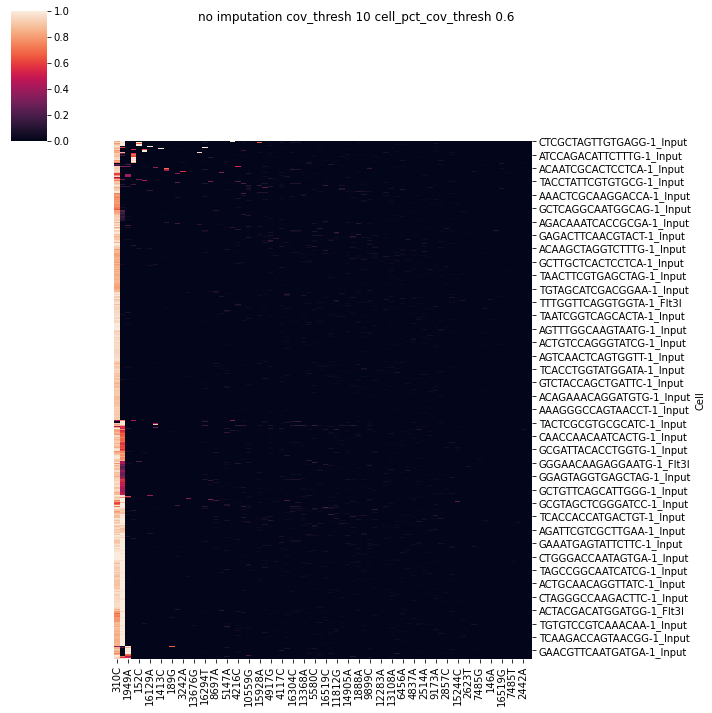

In [11]:
imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh,
                             include_orig=True)

#print(imp_out["imputed_indices"])
print(imp_out["median_d"])

## Save output - af.tsv and dp.tsv

In [12]:
imp_out["impute_af"].to_csv(join(outdir, "af.tsv"), sep="\t")
dp_pile.loc[imp_out["impute_af"].index, imp_out["impute_af"].columns].to_csv(join(outdir, "dp.tsv"), sep="\t")

In [16]:
##  Create VireoIn

# Requires AD sparse matrix
af_df = imp_out["impute_af"].fillna(0)
dp_df = dp_pile.loc[imp_out["impute_af"].index, imp_out["impute_af"].columns].fillna(0)

## REMAP variant names 
# af_df.columns = [vars_map[x] for x in af_df.columns]
# dp_df.columns = [vars_map[x] for x in dp_df.columns]


af_to_vireo(af_df.transpose(), dp_df.transpose(),
            outdir=outdir,
            out_name="cellSNP")

curr_vars = af_df.columns

af_meta = pd.DataFrame({"POS": [int(x[:-1]) for x in curr_vars],
                                                "ALT": [x[-1] for x in curr_vars],
                                                "index": np.arange(1,len(curr_vars)+1),
                                                "REF": [f"{ref_fa.loc[int(x[:-1]),1]}{x[:-1]}" for x in curr_vars]
                                            }
                                        )
af_meta["#CHROM"] = "MT"
af_meta[["#CHROM", "POS", "REF","ALT", "index"]].to_csv(join(outdir, "cellSNP.base.vcf"),
               sep="\t", index=False)


cellSNP.tag


In [17]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor0'

## plot with other parameters

In [ ]:
for k in alt_thresh:
    curr_cell_pct_cov_thresh, curr_cov_thresh = k["cell_pct_cov_thresh"], k["cov_thresh"]
    curr_imp_out = imp.impute_and_plot(af_pile, dp_pile, 
                                       cov_thresh=curr_cov_thresh, cell_pct_cov_thresh=curr_cell_pct_cov_thresh,
                                       include_orig=False)    

In [ ]:
# cell_pct_cov_thresh = 0.4
# cov_thresh = 10
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh,
#                              include_orig=True)

# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])

# cell_pct_cov_thresh = 0.8
# cov_thresh = 10
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])
# # diff_vars_impute = np.abs(imp_df-af_pile).sum().sort_values()[::-1]
# # print(diff_vars_impute)
# # if not (np.abs(imp_df-af_pile).sum().sort_values()[::-1].sum()==0):

# #     diff_vars_impute = diff_vars_impute.index
# #     _, g_pile = impute_and_plot(af_pile.loc[:, diff_vars_impute[:20]], 
# #                                 dp_pile.loc[:, diff_vars_impute[:20]], cov_thresh=cov_thresh, cell_pct_cov_thresh=cell_pct_cov_thresh)
# # else:
# #     print('no imputation done')

# cell_pct_cov_thresh = 0.7
# cov_thresh = 30
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])


# cell_pct_cov_thresh = 0.6
# cov_thresh = 30
# imp_out = imp.impute_and_plot(af_pile, dp_pile, cov_thresh=cov_thresh, 
#                               cell_pct_cov_thresh=cell_pct_cov_thresh, include_orig=True)

# #print("number of variants imputed", len(imp_out["median_d"]))
# #print(imp_out["imputed_indices"])
# print(imp_out["median_d"])



In [ ]:
# from mplh import cluster_help as ch
# ch.plot_cluster(df=imp_out["impute_af"], 
#                 col_meta=pd.DataFrame(imp_out["median_d"], index=["median"]).transpose(),
#                 col_clr_schemes="sequential")

In [ ]:
flat_dp = dp_pile.values.flatten()
flat_dp = flat_dp[flat_dp!=0]
sns.displot(np.log2(1+flat_dp))
#plt.gca().set_ylim([0, 400000])
plt.axvline(np.log2(10), color='green', alpha=0.4)